In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ruptures as rpt
import pandas as pd
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.log.importer.xes import importer as xes_importer
from datetime import date
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import seaborn as sns
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import pm4py
import os
import datetime
log = pm4py.read_xes("../../data/syntheticlog30batches.xes")
from pm4py.algo.discovery.batches import algorithm
batches = algorithm.apply(log)
batchespm4py = set()
for act_res in batches:
    if act_res[0][0]=='b':
        print("activity: "+act_res[0][0]+" resource: "+str(act_res[0][1]))
        print("number of distinct batches: "+str(act_res[1]))
        for batch_type in act_res[2]:
            print(batch_type, len(act_res[2][batch_type]))
            for batch_info in act_res[2][batch_type]:
                print(datetime.datetime.fromtimestamp(batch_info[0]),'to ', datetime.datetime.fromtimestamp(batch_info[1]))
                batchespm4py.add(datetime.datetime.fromtimestamp(batch_info[1]))

parsing log, completed traces ::   0%|          | 0/1999 [00:00<?, ?it/s]

activity: b resource: 9
number of distinct batches: 41
Simultaneous 41
2020-01-28 20:30:00 to  2020-01-28 20:30:00
2020-01-28 23:30:00 to  2020-01-28 23:30:00
2020-01-30 01:30:00 to  2020-01-30 01:30:00
2020-01-30 22:30:00 to  2020-01-30 22:30:00
2020-02-01 17:30:00 to  2020-02-01 17:30:00
2020-02-01 22:30:00 to  2020-02-01 22:30:00
2020-02-02 02:30:00 to  2020-02-02 02:30:00
2020-02-03 00:30:00 to  2020-02-03 00:30:00
2020-02-04 21:30:00 to  2020-02-04 21:30:00
2020-02-06 01:30:00 to  2020-02-06 01:30:00
2020-02-08 23:30:00 to  2020-02-08 23:30:00
2020-02-11 02:30:00 to  2020-02-11 02:30:00
2020-02-25 16:30:00 to  2020-02-25 16:30:00
2020-03-06 16:30:00 to  2020-03-06 16:30:00
2020-03-16 16:30:00 to  2020-03-16 16:30:00
2020-03-26 16:30:00 to  2020-03-26 16:30:00
2020-04-05 16:30:00 to  2020-04-05 16:30:00
2020-04-15 16:30:00 to  2020-04-15 16:30:00
2020-04-25 16:30:00 to  2020-04-25 16:30:00
2020-05-05 16:30:00 to  2020-05-05 16:30:00
2020-05-15 16:30:00 to  2020-05-15 16:30:00
2020-

2020-03-06 16:30:00 to  2020-03-06 16:30:00
2020-03-16 16:30:00 to  2020-03-16 16:30:00
2020-03-26 16:30:00 to  2020-03-26 16:30:00
2020-04-05 16:30:00 to  2020-04-05 16:30:00
2020-04-15 16:30:00 to  2020-04-15 16:30:00
2020-04-25 16:30:00 to  2020-04-25 16:30:00
2020-05-05 16:30:00 to  2020-05-05 16:30:00
2020-05-15 16:30:00 to  2020-05-15 16:30:00
2020-05-25 16:30:00 to  2020-05-25 16:30:00
2020-06-04 16:30:00 to  2020-06-04 16:30:00
2020-06-14 16:30:00 to  2020-06-14 16:30:00
2020-06-24 16:30:00 to  2020-06-24 16:30:00
2020-07-24 16:30:00 to  2020-07-24 16:30:00
2020-08-03 16:30:00 to  2020-08-03 16:30:00
2020-08-23 16:30:00 to  2020-08-23 16:30:00
2020-09-02 16:30:00 to  2020-09-02 16:30:00
2020-09-12 16:30:00 to  2020-09-12 16:30:00
2020-09-22 16:30:00 to  2020-09-22 16:30:00
2020-10-02 16:30:00 to  2020-10-02 16:30:00
2020-10-12 16:30:00 to  2020-10-12 16:30:00
2020-10-22 16:30:00 to  2020-10-22 16:30:00
2020-11-01 16:30:00 to  2020-11-01 16:30:00
2020-11-11 16:30:00 to  2020-11-

In [2]:
targetdatedataframe = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\syntheticlog30batchestarget.csv')
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date
targetdatedataframe['WaitingTime']=pd.to_timedelta(targetdatedataframe['WaitingTime'])

In [3]:
targetdatedataframe


date  tokenproduced  tokenconsumed  tokenleft         WaitingTime  \
0    2020-01-22             42              2         40     4 days 21:00:00   
1    2020-01-23            119              5        154    76 days 02:00:00   
2    2020-01-24            120              8        266   276 days 12:00:00   
3    2020-01-25            133             14        385   581 days 18:30:00   
4    2020-01-26             92             19        458   985 days 16:00:00   
..          ...            ...            ...        ...                 ...   
320  2020-12-07              0              0         39 12179 days 05:30:00   
321  2020-12-08              0              0         39 12218 days 05:30:00   
322  2020-12-09              0              0         39 12257 days 05:30:00   
323  2020-12-10              0              0         39 12296 days 05:30:00   
324  2020-12-11              0             39          0 12323 days 01:00:00   

     Count                                 consumedByUserList  
0       42                                     ['266', '194']  
1      159               ['1878', '1691', '617', '547', '24']  
2      274  ['1947', '1918', '1856', '1828', '1792', '1369...  
3      399  ['1916', '1576', '1507', '1359', '1329', '992'...  
4      477  ['1687', '1590', '1562', '1103', '1048', '1011...  
..     ...                                                ...  
320     39                                                 []  
321     39                                                 []  
322     39                                                 []  
323     39                                                 []  
324     39  ['1993', '1931', '1919', '1896', '1794', '1751...  

[325 rows x 7 columns]

[5, 10, 15, 20, 35, 45, 50, 65, 70, 85, 90, 105, 110, 125, 130, 145, 150, 165, 170, 185, 190, 205, 210, 225, 230, 245, 250, 265, 270, 285, 290, 305, 310, 325]


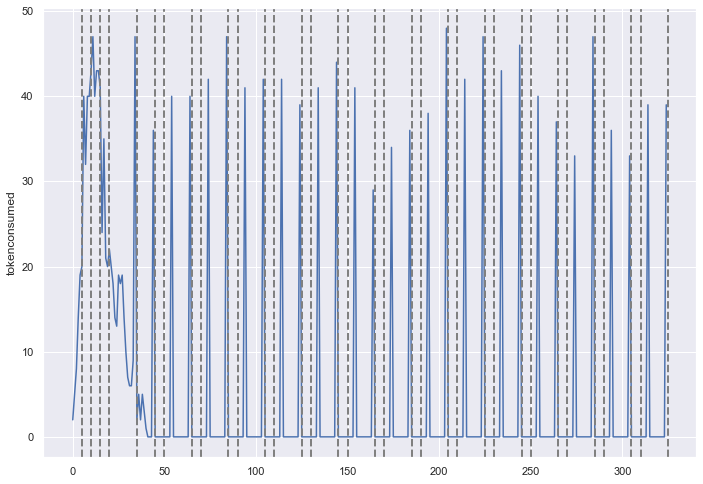

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['tokenconsumed']]
)  # written in pure python
result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenconsumed")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

[5, 10, 20, 30, 325]


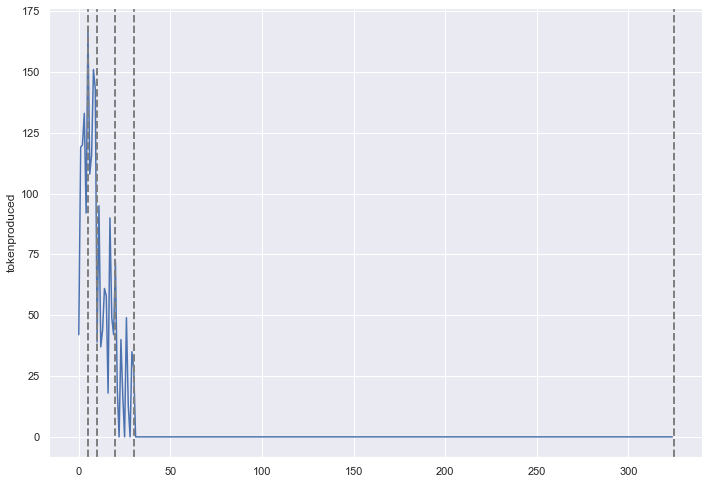

In [11]:
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['tokenproduced']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenproduced")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='date', ylabel='chunkmean'>

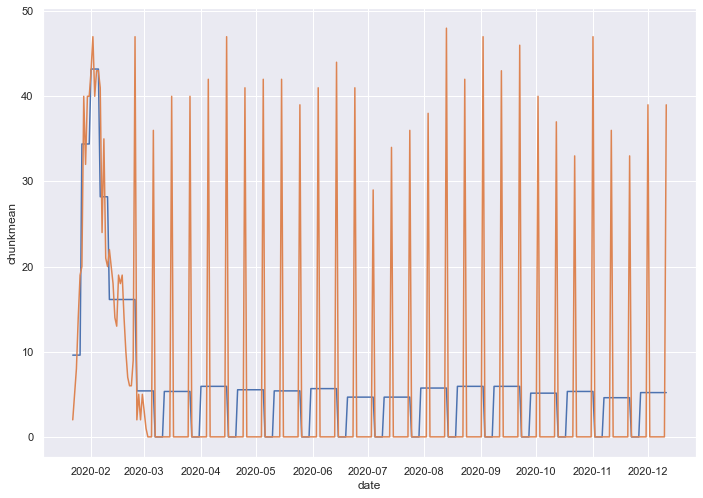

In [23]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")

targetdatedataframe['chunkmean'] = 0
targetdatedataframe['chunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['chunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenconsumed'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['chunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='chunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenconsumed')


In [24]:
def categorise(row):   
    if row['chunkmean']*1.5 < row['tokenconsumed'] and row['tokenconsumed']>1 :
        return 1
    return 0

targetdatedataframe['chunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['chunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['chunkbatched']>0].sort_values(by='date')
batcheddf

31


date  tokenproduced  tokenconsumed  tokenleft  \
4    2020-01-26             92             19        458   
34   2020-02-25              0             47       1180   
44   2020-03-06              0             36       1126   
54   2020-03-16              0             40       1086   
64   2020-03-26              0             40       1046   
74   2020-04-05              0             42       1004   
84   2020-04-15              0             47        957   
94   2020-04-25              0             41        916   
104  2020-05-05              0             42        874   
114  2020-05-15              0             42        832   
124  2020-05-25              0             39        793   
134  2020-06-04              0             41        752   
144  2020-06-14              0             44        708   
154  2020-06-24              0             41        667   
164  2020-07-04              0             29        638   
174  2020-07-14              0             34        604   
184  2020-07-24              0             36        568   
194  2020-08-03              0             38        530   
204  2020-08-13              0             48        482   
214  2020-08-23              0             42        440   
224  2020-09-02              0             47        393   
234  2020-09-12              0             43        350   
244  2020-09-22              0             46        304   
254  2020-10-02              0             40        264   
264  2020-10-12              0             37        227   
274  2020-10-22              0             33        194   
284  2020-11-01              0             47        147   
294  2020-11-11              0             36        111   
304  2020-11-21              0             33         78   
314  2020-12-01              0             39         39   
324  2020-12-11              0             39          0   

                  WaitingTime  Count  \
4           985 days 16:00:00    477   
34        29349 days 17:00:00   1227   
44        39713 days 02:00:00   1162   
54        49759 days 04:00:00   1126   
64        58767 days 17:00:00   1086   
74        67098 days 01:00:00   1046   
84        74449 days 13:30:00   1004   
94        80572 days 15:00:00    957   
104       86243 days 15:00:00    916   
114       90952 days 00:00:00    874   
124       94897 days 02:30:00    832   
134       98341 days 02:00:00    793   
144 0 days 00:00:00.000100767    752   
154 0 days 00:00:00.000101893    708   
164 0 days 00:00:00.000102703    667   
174 0 days 00:00:00.000104665    638   
184 0 days 00:00:00.000105105    604   
194 0 days 00:00:00.000104506    568   
204 0 days 00:00:00.000102842    530   
214       98367 days 14:00:00    482   
224       94178 days 02:30:00    440   
234       88083 days 05:00:00    393   
244       81916 days 13:00:00    350   
254       74110 days 10:00:00    304   
264       66967 days 05:30:00    264   
274       59852 days 03:00:00    227   
284       53083 days 16:30:00    194   
294       41741 days 22:30:00    147   
304       32650 days 13:00:00    111   
314       23797 days 18:30:00     78   
324       12323 days 01:00:00     39   

                                    consumedByUserList  chunkmean  chunkindex  \
4    ['1687', '1590', '1562', '1103', '1048', '1011...   9.600000           1   
34   ['1997', '1990', '1887', '1862', '1845', '1736...  16.133333           5   
44   ['1961', '1863', '1830', '1802', '1797', '1782...   5.400000           6   
54   ['1983', '1962', '1946', '1937', '1903', '1897...   5.333333           8   
64   ['1953', '1933', '1930', '1853', '1812', '1763...   5.333333           8   
74   ['1913', '1874', '1861', '1829', '1767', '1755...   5.933333          10   
84   ['1815', '1803', '1749', '1683', '1601', '1521...   5.933333          10   
94   ['1984', '1883', '1854', '1832', '1787', '1740...   5.533333          12   
104  ['1974', '1938', '1842', '1745', '1716', '1713...   5.533333          12   

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='date', ylabel='pchunkmean'>

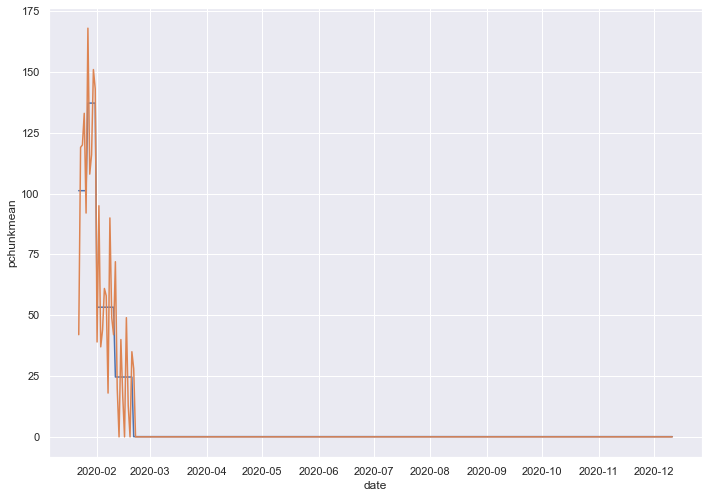

In [14]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['pchunkmean'] = 0
targetdatedataframe['pchunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['pchunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenproduced'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['pchunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='pchunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenproduced')


In [15]:
def categorise(row):   
    if row['pchunkmean'] < row['tokenproduced'] and row['tokenproduced']>1 :
        return 1
    return 0

targetdatedataframe['pchunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['pchunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['pchunkbatched']>0].sort_values(by='date')
batcheddf

99


date  tokenproduced  tokenconsumed  tokenleft       WaitingTime  \
1    2020-01-23             21              0         26  10 days 06:00:00   
3    2020-01-25             28              2         58  80 days 00:00:00   
4    2020-01-26             20              3         75 140 days 23:30:00   
5    2020-01-27             33             10         98 216 days 23:00:00   
7    2020-01-29             32             14        127 405 days 07:30:00   
..          ...            ...            ...        ...               ...   
219  2020-08-28              8              2         11  27 days 13:30:00   
220  2020-08-29              6              1         16  29 days 09:00:00   
229  2020-09-07              7              3          5  10 days 21:30:00   
230  2020-09-08              3              2          6   7 days 12:00:00   
239  2020-09-17              6              2          6  19 days 19:00:00   

     Count                                 consumedByUserList  chunkmean  \
1       26                                                 []       1.80   
3       60                                    ['1059', '859']       1.80   
4       78                              ['653', '163', '108']       1.80   
5      108  ['1848', '1708', '1675', '1411', '898', '616',...      11.30   
7      141  ['1935', '1819', '1572', '1554', '1462', '1147...      11.30   
..     ...                                                ...        ...   
219     13                                    ['1601', '791']       3.60   
220     17                                            ['203']       1.35   
229      8                              ['1604', '223', '79']       1.35   
230      8                                    ['1422', '305']       1.35   
239      8                                     ['988', '207']       1.35   

     chunkindex  chunkbatched  pchunkmean  pchunkindex  pchunkbatched  
1             1             0       16.80            1              1  
3             1             1       16.80            1              1  
4             1             1       16.80            1              1  
5             2             0       25.05            2              1  
7             2             1       25.05            2              1  
..          ...           ...         ...          ...            ...  
219          19             0        3.60           19              1  
220          20             0        1.10           20              1  
229          20             1        1.10           20              1  
230          20             1        1.10           20              1  
239          20             1        1.10           20              1  

[99 rows x 13 columns]

In [25]:
print(len(batchespm4py))
df = pd.DataFrame(batchespm4py, columns = ['batchingdate'])
df['date']=df['batchingdate'].dt.date
df.sort_values(by=['date'])
print(df['date'].nunique())

104
54


In [26]:
pd.set_option('display.max_rows',310)
merged=pd.merge(df,batcheddf,on='date',how='inner')
merged.sort_values(by=['date'])

batchingdate        date  tokenproduced  tokenconsumed  tokenleft  \
6  2020-01-26 00:30:00  2020-01-26             92             19        458   
7  2020-01-26 20:30:00  2020-01-26             92             19        458   
0  2020-02-25 16:30:00  2020-02-25              0             47       1180   
28 2020-03-06 16:30:00  2020-03-06              0             36       1126   
24 2020-03-16 16:30:00  2020-03-16              0             40       1086   
22 2020-03-26 16:30:00  2020-03-26              0             40       1046   
12 2020-04-05 16:30:00  2020-04-05              0             42       1004   
25 2020-04-15 16:30:00  2020-04-15              0             47        957   
13 2020-04-25 16:30:00  2020-04-25              0             41        916   
15 2020-05-05 16:30:00  2020-05-05              0             42        874   
19 2020-05-15 16:30:00  2020-05-15              0             42        832   
8  2020-05-25 16:30:00  2020-05-25              0             39        793   
1  2020-06-04 16:30:00  2020-06-04              0             41        752   
17 2020-06-14 16:30:00  2020-06-14              0             44        708   
2  2020-06-24 16:30:00  2020-06-24              0             41        667   
21 2020-07-04 16:30:00  2020-07-04              0             29        638   
20 2020-07-14 16:30:00  2020-07-14              0             34        604   
11 2020-07-24 16:30:00  2020-07-24              0             36        568   
27 2020-08-03 16:30:00  2020-08-03              0             38        530   
5  2020-08-13 16:30:00  2020-08-13              0             48        482   
16 2020-08-23 16:30:00  2020-08-23              0             42        440   
4  2020-09-02 16:30:00  2020-09-02              0             47        393   
18 2020-09-12 16:30:00  2020-09-12              0             43        350   
30 2020-09-22 16:30:00  2020-09-22              0             46        304   
10 2020-10-02 16:30:00  2020-10-02              0             40        264   
26 2020-10-12 16:30:00  2020-10-12              0             37        227   
14 2020-10-22 16:30:00  2020-10-22              0             33        194   
31 2020-11-01 16:30:00  2020-11-01              0             47        147   
29 2020-11-11 16:30:00  2020-11-11              0             36        111   
9  2020-11-21 16:30:00  2020-11-21              0             33         78   
23 2020-12-01 16:30:00  2020-12-01              0             39         39   
3  2020-12-11 16:30:00  2020-12-11              0             39          0   

                 WaitingTime  Count  \
6          985 days 16:00:00    477   
7          985 days 16:00:00    477   
0        29349 days 17:00:00   1227   
28       39713 days 02:00:00   1162   
24       49759 days 04:00:00   1126   
22       58767 days 17:00:00   1086   
12       67098 days 01:00:00   1046   
25       74449 days 13:30:00   1004   
13       80572 days 15:00:00    957   
15       86243 days 15:00:00    916   
19       90952 days 00:00:00    874   
8        94897 days 02:30:00    832   
1        98341 days 02:00:00    793   
17 0 days 00:00:00.000100767    752   
2  0 days 00:00:00.000101893    708   
21 0 days 00:00:00.000102703    667   
20 0 days 00:00:00.000104665    638   
11 0 days 00:00:00.000105105    604   
27 0 days 00:00:00.000104506    568   
5  0 days 00:00:00.000102842    530   
16       98367 days 14:00:00    482   
4        94178 days 02:30:00    440   
18       88083 days 05:00:00    393   
30       81916 days 13:00:00    350   
10       74110 days 10:00:00    304   
26       66967 days 05:30:00    264   
14       59852 days 03:00:00    227   
31       53083 days 16:30:00    194   
29       41741 days 22:30:00    147   
9        32650 days 13:00:00    111   
23       23797 days 18:30:00     78   
3        12323 days 01:00:00     39   

                                   consumedByUserList  chunkmean  chunkindex  \
6   ['1687', '1590', '1562', '1103

In [27]:
merged.nunique()

batchingdate          32
date                  31
tokenproduced          2
tokenconsumed         16
tokenleft             31
WaitingTime           31
Count                 31
consumedByUserList    31
chunkmean             12
chunkindex            17
chunkbatched           1
pchunkmean             2
pchunkindex            2
dtype: int64

In [ ]:
Shared - 32
Pm4py- 54
Statistical- 32
Original- 30


In [21]:
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date